In [2]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib.patches as mpatches
from color import color
from matplotlib.gridspec import GridSpec
import pickle 

import matplotlib_inline
import seaborn as sns
import pandas as pd

import approximation, objectives, sets

import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') # vector plots

from PIL import Image, ImageDraw

sns.set_theme() # set seaborn theme
plt.rcParams["font.sans-serif"] = "Times New Roman"
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["pdf.fonttype"] = 42
plt.rcParams["ps.fonttype"] = 42
plt.rcParams["axes.facecolor"] = color["grey"]
plt.rcParams["figure.autolayout"] = True # tight layout
%matplotlib inline

%load_ext autoreload
%autoreload 2

2024-06-08 10:39:29.442478: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
bins = 20

df = pd.read_csv("datasets/umap.csv")
df.drop("Unnamed: 0", axis=1, inplace=True)

dataset = sets.Dataset(data=df, 
                       features=["X Specter", "Y Specter", "X TFIDF", "Y TFIDF"], 
                       bins=bins,
                       interval = (0, bins))

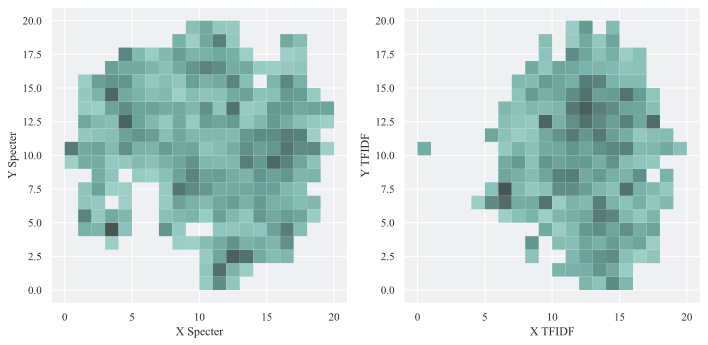

In [164]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

sns.histplot(x="X Specter", 
             y="Y Specter", 
             data=dataset.scaled,
             bins=range(0, bins + 1), 
             color=color["green"], 
             ax=axs[0])

sns.histplot(x="X TFIDF", 
             y="Y TFIDF", 
             data=dataset.scaled,
             bins=range(0, bins + 1), 
             color=color["green"], 
             ax=axs[1])

# sns.scatterplot(x="X Specter", 
#                 y="Y Specter", 
#                 data=dataset.scaled,
#                 color=color["green"], 
#                 edgecolor=None,
#                 alpha=0.5,
#                 ax=axs[0])

# sns.scatterplot(x="X TFIDF", 
#                 y="Y TFIDF", 
#                 data=dataset.scaled,
#                 color=color["green"], 
#                 edgecolor=None,
#                 alpha=0.5,
#                 ax=axs[1])

axs[0].set_aspect('equal', 'box')
axs[1].set_aspect('equal', 'box')

In [174]:
s = 300

z, timeTotal, loss = approximation.greedySwap(dataset, s=s, objective=objectives.embeddingCoverageDistinct)
subset = sets.Subset(dataset, z, length=s)
print(loss)

with open(f'size={s}_obj=coverageDistinct_k={k}_bins={bins}.pkl', 'wb') as f:
    pickle.dump(subset, f)

0: -501.79945255689256
1: -503.8570140855076
2: -507.4925340643058
3: -508.6873627335082
4: -508.76254034809506
5: -509.21576451246614
6: -510.05514869539536
7: -511.44353987637544
8: -511.9734118306309
9: -514.1559055919367
10: -516.6257710707744
11: -519.1220327767934
12: -519.7404480189134
13: -519.7404480189134
14: -524.3407545396326
15: -526.5928501304096
16: -529.3969607399085
17: -530.4561543628204
18: -531.2673472081195
19: -533.2983408342311
20: -537.449417831316
21: -539.3807813017801
22: -539.8699228167239
23: -540.4588224326503
24: -542.1630130098786
25: -543.3489979550986
26: -543.6407149464621
27: -544.2260465332187
28: -544.2260465332187
29: -546.3288973930055
30: -546.3288973930055
31: -546.3288973930055
32: -546.7109610468054
33: -547.0617768209408
34: -547.216492984772
35: -549.1147495118054
36: -549.5108056819615
37: -549.7774951173344
38: -551.0915675846661
39: -551.5757982048851
40: -553.2323573699138
41: -553.2323573699138
42: -553.6634904797396
43: -553.938289554

KeyboardInterrupt: 

In [6]:
bins = 20

bin_edges = np.arange(bins + 1)  # This will create edges [0, 1, 2, 3, 4, 5]

# Assign bins for each dimension
x_specter_bins = np.digitize(dataset.scaled['X Specter'], bin_edges) - 1
y_specter_bins = np.digitize(dataset.scaled['Y Specter'], bin_edges) - 1
x_tfidf_bins = np.digitize(dataset.scaled['X TFIDF'], bin_edges) - 1
y_tfidf_bins = np.digitize(dataset.scaled['Y TFIDF'], bin_edges) - 1

# Combine the bin indices for 2D bins
dataset.scaled['Specter 2D Bin'] = list(zip(x_specter_bins, y_specter_bins))
dataset.scaled['TFIDF 2D Bin'] = list(zip(x_tfidf_bins, y_tfidf_bins))

specter = len(dataset.scaled['Specter 2D Bin'].unique()) 
tfidf = len(dataset.scaled['TFIDF 2D Bin'].unique())
coverage = specter + tfidf

print(specter, tfidf, coverage, coverage/2)

268 201 469 234.5


In [204]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 11))

sns.scatterplot(x="X Specter", 
                y="Y Specter", 
                data=dataset.scaled,
                color=color["darkGreen"], 
                edgecolor=None,
                alpha=0.6,
                ax=axs[0, 0])

sns.scatterplot(x="X TFIDF", 
                y="Y TFIDF", 
                data=dataset.scaled,
                color=color["darkGreen"], 
                edgecolor=None,
                alpha=0.6,
                ax=axs[0, 1])

bins = 40
dataset = sets.Dataset(data=df, 
                       features=["X Specter", "Y Specter", "X TFIDF", "Y TFIDF"], 
                       bins=bins,
                       interval = (0, bins))

bins = 20
dataset = sets.Dataset(data=df, 
                       features=["X Specter", "Y Specter", "X TFIDF", "Y TFIDF"], 
                       bins=bins,
                       interval = (0, bins))
with open(f'size=300_obj=coverage_k=5129_bins={bins}.pkl', 'rb') as f:
    subsetSmall = pickle.load(f)

sns.histplot(x="X Specter", 
             y="Y Specter", 
             data=dataset.scaled,
             bins=range(0, 20 + 1), 
             color=color["green"], 
             ax=axs[1, 0])

sns.histplot(x="X TFIDF", 
             y="Y TFIDF", 
             data=dataset.scaled,
             bins=range(0, 20 + 1), 
             color=color["green"], 
             ax=axs[1, 1])

sns.scatterplot(x="X Specter", 
                y="Y Specter", 
                data=subsetSmall.data,
                color=color["yellow"], 
                edgecolor=None,
                alpha=0.6,
                ax=axs[1, 0])

sns.scatterplot(x="X TFIDF", 
                y="Y TFIDF", 
                data=subsetSmall.data,
                color=color["yellow"], 
                edgecolor=None,
                alpha=0.6,
                ax=axs[1, 1])

axs[0, 0].set_title("Specter")
axs[0, 1].set_title("TFIDF")
axs[1, 0].set_title("Specter")
axs[1, 1].set_title("TFIDF")

for ax in axs.flatten():
    ax.set_aspect('equal', 'box')
    ax.set_yticks(range(0, 25, 5))
    ax.set_xticks(range(0, 25, 5))
    ax.set_ylabel(None)
    ax.set_xlabel(None)

fig.text(0.5, 0.98, 'Text Embeddings', ha='center', fontsize=16)
fig.text(0.5, 0.49, 'Discrete Coverage', ha='center', fontsize=16)


plt.subplots_adjust(hspace=25, wspace=25)
plt.savefig("embeddings.pdf", bbox_inches="tight", format="pdf")